## Movie Reccomendation System

Scheme: Content based recommendation system using movie lens dataset

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

fetching data

In [3]:
columns=["user_id", "item_id", "rating", "timestamp"]
df=pd.DataFrame()
df.index
df=pd.read_csv("./movielens_dataset/u.data",delimiter="\t", names=columns)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df["user_id"].nunique()

943

In [7]:
df["item_id"].nunique()

1682

In [8]:
movie_data=pd.read_csv("movielens_dataset/u.item",  sep='|',header=None,  encoding='ISO-8859-1')

In [9]:
movie_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
movie_titles = movie_data[[0,1]]

In [11]:
movie_titles.columns = ["item_id", "title"]

In [17]:
df=pd.merge(df, movie_titles, on="item_id")

####  Exploring Data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [23]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [26]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [27]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [29]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [30]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [32]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


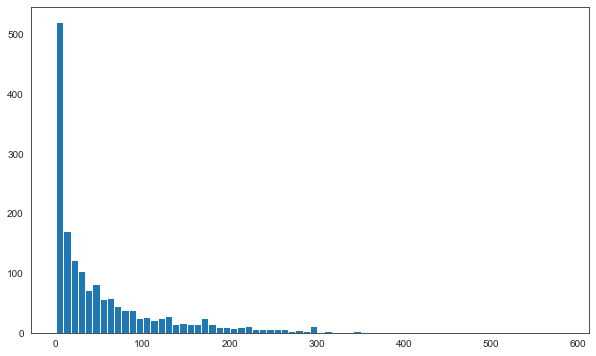

In [36]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'], bins=70)
plt.show()

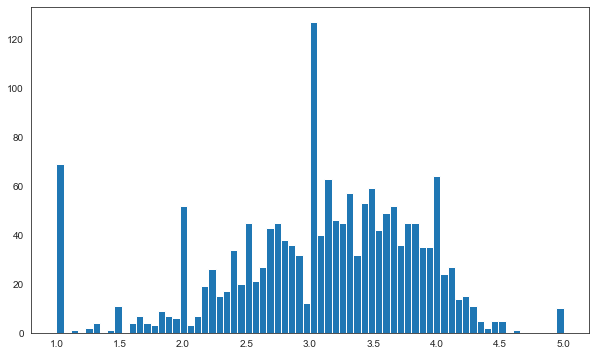

In [37]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'], bins=70)
plt.show()

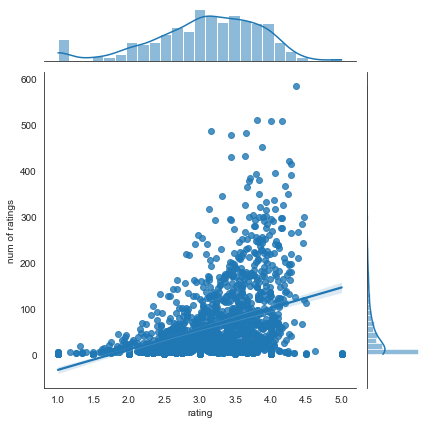

In [47]:
sns.jointplot(data=ratings, x=ratings['rating'], y=ratings['num of ratings'], kind="reg")

#### Movie Recomendation 

In [39]:
mat=df.pivot_table(index="user_id", columns="title", values="rating")

In [43]:
def predict_movie(movie_name):
    movie_user_ratings = mat[movie_name]
    similer = mat.corrwith(movie_user_ratings)
    corr_movie= pd.DataFrame(similer, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie= corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation', ascending=False)
    
    return predictions

In [44]:
sample1= predict_movie("Titanic (1997)")
sample1.head()

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
